In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    RocCurveDisplay,
    ConfusionMatrixDisplay,

)


In [28]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1yzlnV3dg9pd1ubcCThzYbaPmqbU3xc_D')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [30]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
data = df.drop(columns=['Id'])

le = LabelEncoder()
data['Species_encoded'] = le.fit_transform(data['Species'])
X = data.drop(columns=['Species'])
y = data['Species']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [34]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [35]:
y_pred = dt.predict(X_test)


In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



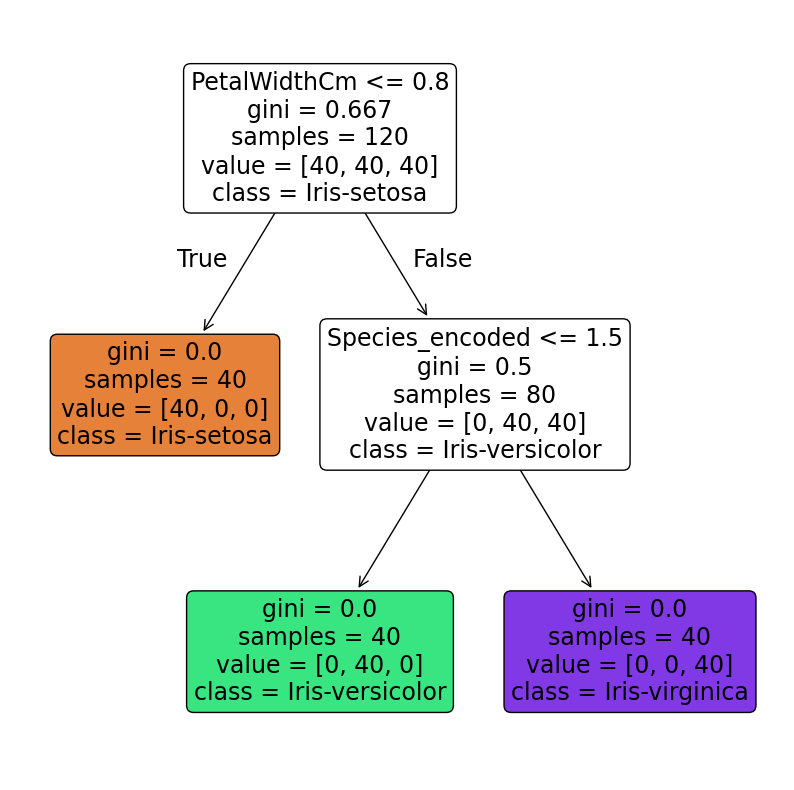

In [42]:
plt.figure(figsize=(10,10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=dt.classes_,
    filled=True,
    rounded=True
)
plt.show()


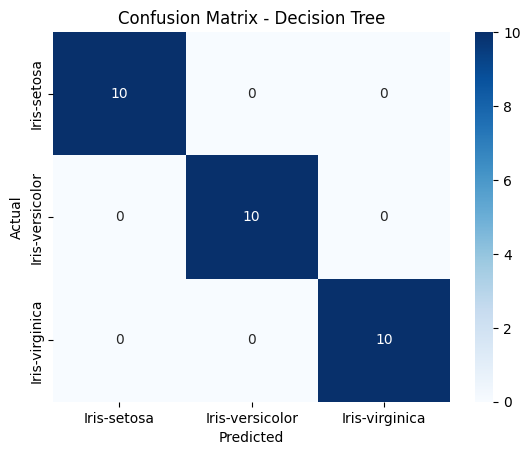

In [40]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=dt.classes_,
    yticklabels=dt.classes_
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()



In [41]:
scores = {}
for d in range(2, 9):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores

best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d] * 100, 2), "%")


Best max_depth: 2 | Acc: 100.0 %
